In [3]:
# pylab
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import integrate

In [4]:
from IPython.display import IFrame, display
file = 'Lectures/SeriesFourier.pdf'
IFrame(file, width=550, height=400)

# Series de Fourier

$$ f(t) \approx \frac{a_{0}}{2} + \sum_{n=1}^{\infty} [  a_{n} cos(\frac{2\pi n}{T}t) + b_{n} sin( \frac{2\pi n}{T} t)  ]  $$ 

donde $a_{0}$, $a_{n}$ y $b_{n}$ son los coeficientes de fourier 

$a_{0} = \frac{2}{T} \int_{-T/2}^{T/2} f(t)dt $,   $a_{n} = \frac{2}{T} \int_{-T/2}^{T/2} f(t)cos(\frac{2\pi n}{T}t) dt $ y   $b_{n} = \frac{2}{T} \int_{-T/2}^{T/2} f(t)sin(\frac{2\pi n}{T}t) dt $

## Hagamos un par de ejemplos usando integrate 

$$ y(t)=t,  \ -1 < t < 1  $$

$$ y(t) = \left\{ \begin{array}{cc}
1 & -1 < t < 0 \\
0 &  0 < t < 1 \\
\end{array}
\right.
$$

In [5]:
# definimos f(t)
def f(t):
    return t

In [11]:
def GetFourier(t, T, N):
    
    y = t
    
    a0, error0 = integrate.quad(lambda t: f(t), -0.5*T, 0.5*T)
    a0 *= 2./T
    
    y = a0
    
    for n in range(1,N):
        an, erroran = integrate.quad(lambda t: f(t)*np.cos( (2*np.pi*n*t)/T ), -0.5*T, 0.5*T)
        bn, errorbn = integrate.quad(lambda t: f(t)*np.sin( (2*np.pi*n*t)/T ), -0.5*T, 0.5*T)
        y += an*np.cos( (2*np.pi*n*t)/T ) + bn*np.sin( (2*np.pi*n*t)/T ) 
    
    return y

In [14]:
t = np.arange(-3.,3.,0.01)
y = GetFourier(t,2,50)

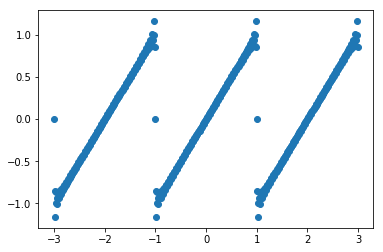

In [16]:
fig = plt.figure()
#plt.plot(t,y)
plt.scatter(t,y)